## Time vs. Movie Ratings
#### Hypothesis:
Movie ratings, on average, have gotten better as time went on.

In [66]:
movieRatings_by_year <- imdb_movies %>%
    separate(date_published, into = c("year", "month", "day"), sep = "-") %>%
    group_by(year) %>%
    mutate(year = as.double(year)) %>%
    summarize(avg_rating = mean(avg_vote, na.rm = TRUE), votes = sum(votes)) %>%
    na.omit %>%
    print(width = Inf)

Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 4563 rows [6, 56, 101, 118, 145, 176, 204, 224, 227, 249, 250, 253, 259, 261, 337, 344, 373, 398, 399, 438, ...].”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


# A tibble: 113 x 3
    year avg_rating votes
   <dbl>      <dbl> <dbl>
 1  1894       5.9    154
 2  1906       6.1    589
 3  1911       6.14  2833
 4  1912       6.05  1174
 5  1913       6.44  9364
 6  1914       6.11 15676
 7  1915       6.4  37142
 8  1916       6.28 13079
 9  1917       6.32 12292
10  1918       6.11 31847
# … with 103 more rows


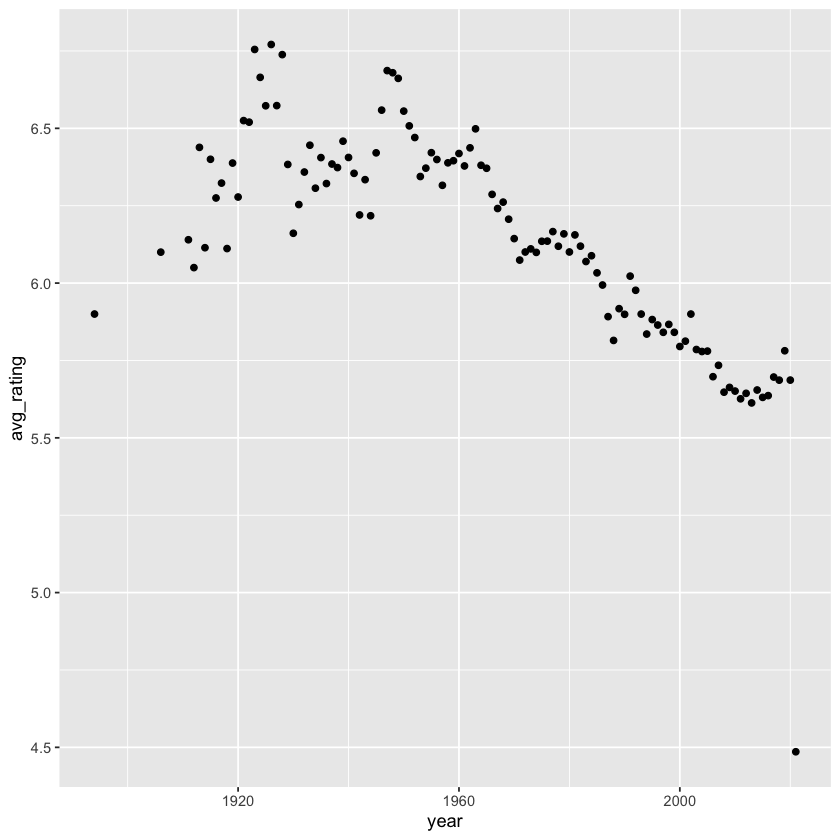

In [14]:
ggplot(data = movieRatings_by_year) +
    geom_point(mapping = aes(x = year, y = avg_rating))

Seeing that there is a general downward trend in movie ratings over the years, with a drastic drop in the year 2021 (which might be due to the lack of data for that year), we found a linear model to the data:

In [15]:
lmFit_yearVavgRating <- lm(avg_rating ~ year, data = movieRatings_by_year)
lmFit_yearVavgRating

a_lmFit_yVaR <- lmFit_yearVavgRating[[1]]


Call:
lm(formula = avg_rating ~ year, data = movieRatings_by_year)

Coefficients:
(Intercept)         year  
  21.643816    -0.007888  


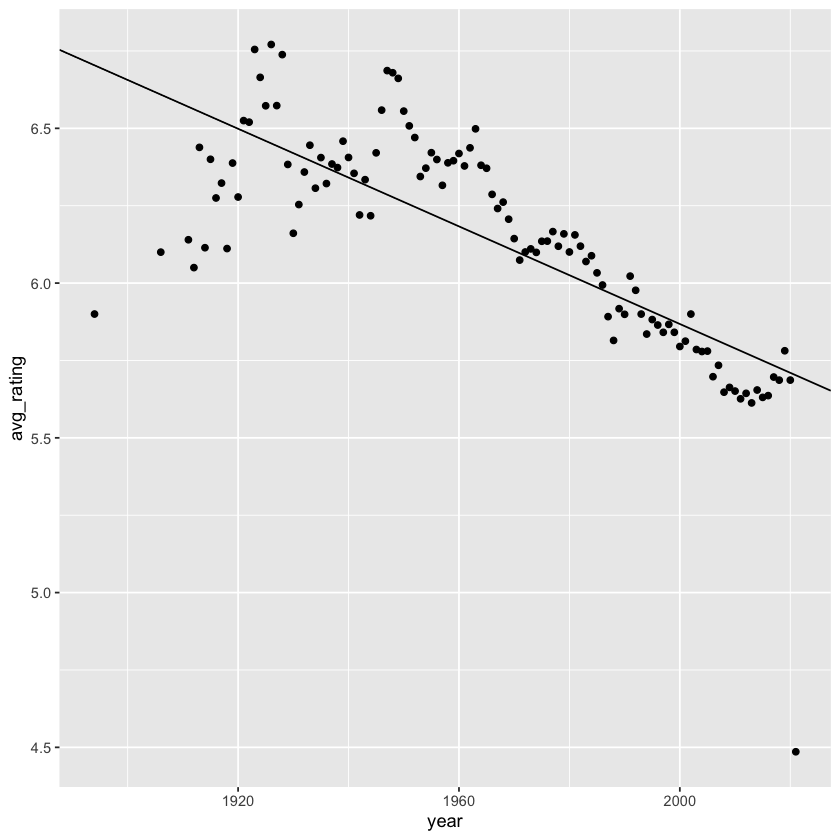

In [16]:
ggplot(data = movieRatings_by_year, mapping = aes(x = year, y = avg_rating)) +
    geom_point() +
    geom_abline(mapping = aes(intercept = a_lmFit_yVaR[1], slope = a_lmFit_yVaR[2]))

From here, we thought it'd be interesting to look at the average rating by month, for all years combined:

In [17]:
avg_movieRatings_by_month <- imdb_movies %>%
    separate(date_published, into = c("year", "month", "day"), sep = "-") %>%
    group_by(month) %>%
    summarize(avg_rating = mean(avg_vote, na.rm = TRUE)) %>%
    na.omit

avg_movieRatings_by_month

Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 4563 rows [6, 56, 101, 118, 145, 176, 204, 224, 227, 249, 250, 253, 259, 261, 337, 344, 373, 398, 399, 438, ...].”


month,avg_rating
<chr>,<dbl>
01,5.912985
02,5.932510
03,5.932239
04,5.915880
05,5.862190
06,5.840655
07,5.785444
08,5.843288
09,5.969687


At first glance, all the ratings seem close together, but after graphing...

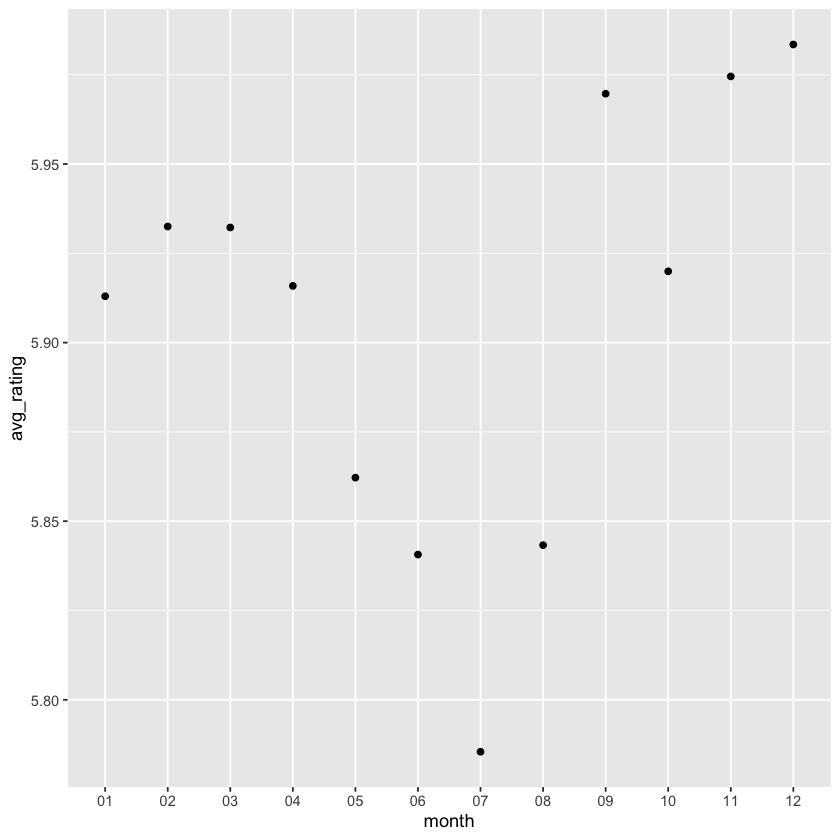

In [18]:
ggplot(data = avg_movieRatings_by_month) +
    geom_point(mapping = aes(x = month, y = avg_rating))

While all ratings were within a 5-6 rating, it was noted that December, November, and September had the highest ratings on average over the time period in the dataset.

Hypothesis: Movie ratings, on average, have gotten better as time went on.  
Post-modeling: As time has progressed, movie ratings have actually gotten worse.  Wondering why this could be so, it might be because more people's votes were counted to find the rating of a movie in recent years as compared to a century ago.  Additionally, when determining if a specific month had better movie rating than another, it was interesting to see that the late fall and early winter months will have the highest ratings on average, which is possibly due to the holiday season and the cooler temperatures of the year so maybe people want to do more indoor activities (like going to the theatre and watching a movie).